In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import requests
import seaborn as sns 
from datetime import datetime
import re

import shapely.wkt
import shapely.geometry as sg
import shapely.ops as so
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# read the csv
traceFarmDF = pd.read_csv('sample-data.csv')
traceFarmDF

,id,Pair_a,Pair_b
0,0,"POLYGON ((30.9195000615594 1.22320399310169, 3...","POLYGON ((30.9178628236499 1.22298964247023, 3..."
1,1,"POLYGON ((30.9154907 1.2168457697, 30.91549089...","POLYGON ((30.9176490186294 1.21758566108396, 3..."
2,2,"POLYGON ((31.7216862920056 1.83134403943523, 3...","POLYGON ((31.7216862920056 1.83134403943523, 3..."
3,3,"POLYGON ((31.7023455560315 1.83796156365404, 3...","POLYGON ((31.7023455560315 1.83796156365404, 3..."
4,4,"POLYGON ((31.7061141722958 1.83877089201203, 3...","POLYGON ((31.7061141722958 1.83877089201203, 3..."
...,...,...,...
508,518,"POLYGON ((31.7238549270953 1.83305204935236, 3...","POLYGON ((31.7238739520933 1.83309296342696, 3..."
509,519,"POLYGON ((31.7238549270953 1.83305204935236, 3...","POLYGON ((31.7238739520933 1.83309296342696, 3..."
510,520,"POLYGON ((31.7238549270953 1.83305204935236, 3...","POLYGON ((31.7238739520933 1.83309296342696, 3..."
511,521,"POLYGON ((31.7238549270953 1.83305204935236, 3...","POLYGON ((31.7238739520933 1.83309296342696, 3..."


<AxesSubplot:>

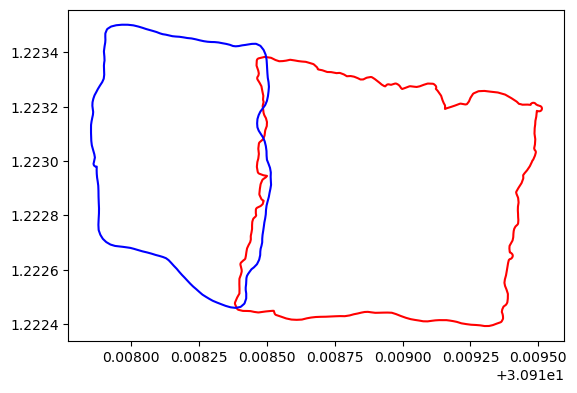

In [28]:
# plot two polygons
testPlot1 = shapely.wkt.loads(traceFarmDF.iloc[0][1])
testPlot2 = shapely.wkt.loads(traceFarmDF.iloc[0][2])
polys = [testPlot1, testPlot2]
colors = ['red','blue']
gpd.GeoSeries(polys).boundary.plot(color = colors)

In [4]:
# Calculate the overlapping area
overlapArea = []
percentOverlap = []
for index, row in traceFarmDF.iterrows():
    # if overlap exists then calculate area
    pairA = shapely.wkt.loads(row[1])
    pairB = shapely.wkt.loads(row[2])
    if pairA.intersects(pairB):
        overlapArea.append(pairA.intersection(pairB).area)
    else:
        overlapArea.append(0)
    percentOverlap.append(pairA.intersection(pairB).area / (pairA.area + pairB.area - pairA.intersection(pairB).area))
        

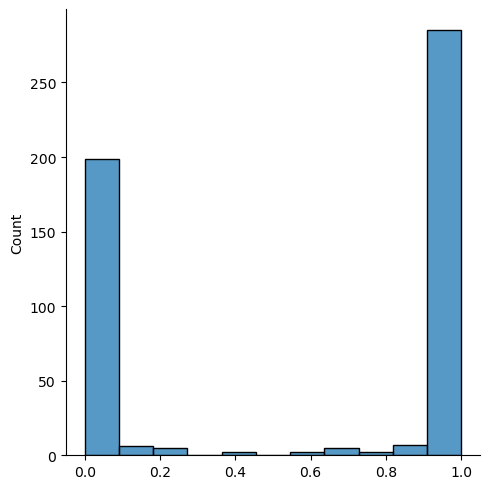

In [5]:
# this distribution tells us that there are many duplicates and many minor overlaps
sns.displot(percentOverlap)

In [6]:
#index keeps the original index before sorting. I do this sort to make it easier to analyze the inverted bell curve distribution
index = sorted(range(len(percentOverlap)), key=lambda k: percentOverlap[k])
percentOverlap.sort()
zipped = list(zip(index, percentOverlap))
percentOverlapSortedDF = pd.DataFrame(zipped, columns=['Index', "percentOverlap"]) 

In [7]:
# 303 out of 513 areas have significant overlap, greater than 40%
percentOverlapSortedDF.loc[(percentOverlapSortedDF["percentOverlap"] > 0.4)]

,Index,percentOverlap
210,272,0.407054
211,22,0.446020
212,73,0.568904
213,41,0.616310
214,350,0.661665
...,...,...
508,461,1.000000
509,52,1.000000
510,98,1.000000
511,270,1.000000


In [8]:
# 285 out of 513 areas have high significant overlap, greater than 90%
percentOverlapSortedDF.loc[(percentOverlapSortedDF["percentOverlap"] > 0.90)]

,Index,percentOverlap
228,25,1.0
229,26,1.0
230,27,1.0
231,28,1.0
232,29,1.0
...,...,...
508,461,1.0
509,52,1.0
510,98,1.0
511,270,1.0


In [9]:
# This snippet of code finds duplicates of A's in A's and B's in B's and stores them
# It does not check duplicates of A's in B's and B's in A's since that was covered above

indexStoreDF = pd.DataFrame(columns=['Index', "Duplicate index A", "Duplicate index B"])
for index, row in traceFarmDF.iterrows():
    dupeIndexA = []
    dupeIndexB = []
    print("working on index: " + str(index))
    pairACompare = shapely.wkt.loads(row[1])
    pairBCompare = shapely.wkt.loads(row[2])


    for indexTemp, rowTemp in traceFarmDF.iterrows():
        pairATemp = shapely.wkt.loads(rowTemp[1])
        pairBTemp = shapely.wkt.loads(rowTemp[2])
        if pairACompare.intersects(pairATemp):
            if (pairACompare.intersection(pairATemp).area / (pairACompare.area + pairATemp.area - pairACompare.intersection(pairATemp).area)) > 0.8:
                dupeIndexA.append(indexTemp)
            if (pairBCompare.intersection(pairBTemp).area / (pairBCompare.area + pairBTemp.area - pairBCompare.intersection(pairBTemp).area)) > 0.8:
                dupeIndexB.append(indexTemp)
    indexStoreDF.loc[len(indexStoreDF)] = [index,dupeIndexA,dupeIndexB]
        
        


working on index: 0
working on index: 1
working on index: 2
working on index: 3
working on index: 4
working on index: 5
working on index: 6
working on index: 7
working on index: 8
working on index: 9
working on index: 10
working on index: 11
working on index: 12
working on index: 13
working on index: 14
working on index: 15
working on index: 16
working on index: 17
working on index: 18
working on index: 19
working on index: 20
working on index: 21
working on index: 22
working on index: 23
working on index: 24
working on index: 25
working on index: 26
working on index: 27
working on index: 28
working on index: 29
working on index: 30
working on index: 31
working on index: 32
working on index: 33
working on index: 34
working on index: 35
working on index: 36
working on index: 37
working on index: 38
working on index: 39
working on index: 40
working on index: 41
working on index: 42
working on index: 43
working on index: 44
working on index: 45
working on index: 46
working on index: 47
wo

working on index: 378
working on index: 379
working on index: 380
working on index: 381
working on index: 382
working on index: 383
working on index: 384
working on index: 385
working on index: 386
working on index: 387
working on index: 388
working on index: 389
working on index: 390
working on index: 391
working on index: 392
working on index: 393
working on index: 394
working on index: 395
working on index: 396
working on index: 397
working on index: 398
working on index: 399
working on index: 400
working on index: 401
working on index: 402
working on index: 403
working on index: 404
working on index: 405
working on index: 406
working on index: 407
working on index: 408
working on index: 409
working on index: 410
working on index: 411
working on index: 412
working on index: 413
working on index: 414
working on index: 415
working on index: 416
working on index: 417
working on index: 418
working on index: 419
working on index: 420
working on index: 421
working on index: 422
working on

In [10]:
# this dataframe describes duplicates - for index 508, A is similar to 507_a, 508_a, 509_a, 510_a, 511_a and for
# index 508 B, it is similar to 508_b, 509_b, 510_b, 511_b, 512_b
indexStoreDF

,Index,Duplicate index A,Duplicate index B
0,0,[0],[0]
1,1,[1],[1]
2,2,[2],[2]
3,3,[3],[3]
4,4,[4],[4]
...,...,...,...
508,508,"[507, 508, 509, 510, 511]","[508, 509, 510, 511, 512]"
509,509,"[507, 508, 509, 510, 511]","[508, 509, 510, 511, 512]"
510,510,"[507, 508, 509, 510, 511]","[508, 509, 510, 511, 512]"
511,511,"[507, 508, 509, 510, 511]","[508, 509, 510, 511, 512]"


In [11]:
# Sample Index 12, A: Since 13, 14, 15, 17, 18, and 19 are similar then this could mean that the equivalent B's can
# be considered "neighbours"
indexStoreDF.loc[12]

Index                                          12
Duplicate index A    [12, 13, 14, 15, 17, 18, 19]
Duplicate index B                     [9, 10, 12]
Name: 12, dtype: object

<AxesSubplot:>

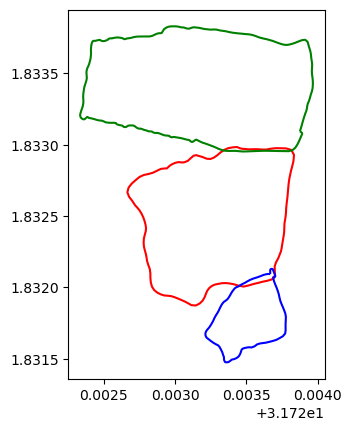

In [12]:
# for index 12 A, we can identify duplicates and neighbours based on the above 
testPlot1 = shapely.wkt.loads(traceFarmDF.iloc[12][1])
testPlot2 = shapely.wkt.loads(traceFarmDF.iloc[12][2]) # duplicate
testPlot3 = shapely.wkt.loads(traceFarmDF.iloc[13][2]) # Neighbours
testPlot4 = shapely.wkt.loads(traceFarmDF.iloc[14][2]) # Neighbours
testPlot5 = shapely.wkt.loads(traceFarmDF.iloc[15][2]) # Neighbour, duplicate of 14
testPlot6 = shapely.wkt.loads(traceFarmDF.iloc[17][2]) # Neighbour, duplicate of 13
testPlot7 = shapely.wkt.loads(traceFarmDF.iloc[18][2]) # Neighbour, duplicate of 14
testPlot8 = shapely.wkt.loads(traceFarmDF.iloc[19][2]) # Neighbour, duplicate of 14
testPlot9 = shapely.wkt.loads(traceFarmDF.iloc[9][1]) # Neighbour, duplicate of 13
testPlot10 = shapely.wkt.loads(traceFarmDF.iloc[10][1]) # Neighbour, duplicate of 13
polys = [testPlot1, testPlot3, testPlot4]
colors = ['red','blue', 'green']
gpd.GeoSeries(polys).boundary.plot(color = colors)

In [13]:
percentOverlapSortedDF.loc[(percentOverlapSortedDF["percentOverlap"] > 0.20)]

,Index,percentOverlap
206,50,0.210006
207,44,0.220836
208,43,0.230268
209,24,0.238500
210,272,0.407054
...,...,...
508,461,1.000000
509,52,1.000000
510,98,1.000000
511,270,1.000000


<AxesSubplot:>

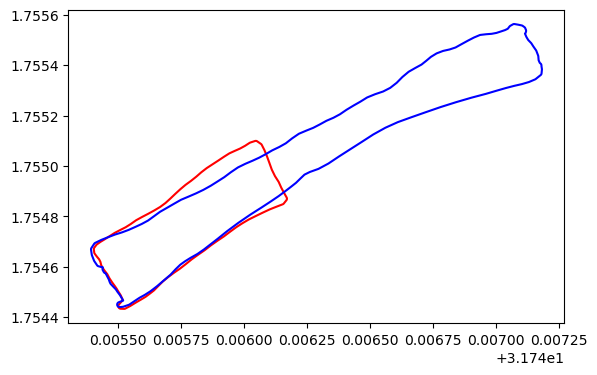

In [14]:
# 40.70% overlap, what does this look like
testPlot1 = shapely.wkt.loads(traceFarmDF.iloc[272][1])
testPlot2 = shapely.wkt.loads(traceFarmDF.iloc[272][2])
polys = [testPlot1, testPlot2]
colors = ['red','blue']
gpd.GeoSeries(polys).boundary.plot(color = colors)

<AxesSubplot:>

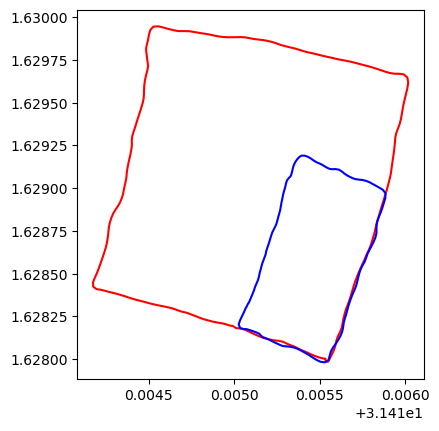

In [15]:
# 23.85% overlap, what does this look like
testPlot1 = shapely.wkt.loads(traceFarmDF.iloc[24][1])
testPlot2 = shapely.wkt.loads(traceFarmDF.iloc[24][2])
polys = [testPlot1, testPlot2]
colors = ['red','blue']
gpd.GeoSeries(polys).boundary.plot(color = colors)

<AxesSubplot:>

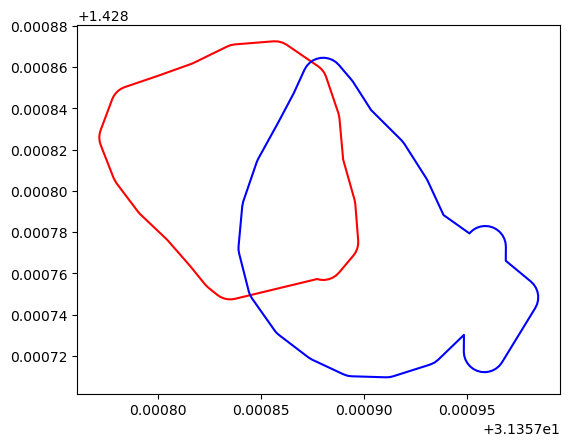

In [16]:
# 21.00% overlap, what does this look like
testPlot1 = shapely.wkt.loads(traceFarmDF.iloc[50][1])
testPlot2 = shapely.wkt.loads(traceFarmDF.iloc[50][2])
polys = [testPlot1, testPlot2]
colors = ['red','blue']
gpd.GeoSeries(polys).boundary.plot(color = colors)

In [17]:
percentOverlapSortedDF.loc[(percentOverlapSortedDF["percentOverlap"] > 0.40)]

,Index,percentOverlap
210,272,0.407054
211,22,0.446020
212,73,0.568904
213,41,0.616310
214,350,0.661665
...,...,...
508,461,1.000000
509,52,1.000000
510,98,1.000000
511,270,1.000000


In [18]:
# find all unique IDs that belong in A and B - we only take the first element since the data is sorted
# this will calculate the total number of unique polygons in sets a-b
uniqueIdA = []
uniqueIdB = []
uniqueList = []
for i in list(indexStoreDF['Duplicate index A']):
    uniqueIdA.append(i[0])
for i in list(indexStoreDF['Duplicate index B']):
    uniqueIdB.append(i[0])    
uniqueIdA = list(dict.fromkeys(uniqueIdA))
uniqueIdB = list(dict.fromkeys(uniqueIdB))

# duplicates between A and B
dupeIds = list(percentOverlapSortedDF.loc[(percentOverlapSortedDF["percentOverlap"] > 0.40)]["Index"])
dupeIds.sort()

# check if unique id A exists, if not then add it
nonDupeIdA = []
nonDupeIdB = []
dupeIdAll = []

for i in uniqueIdA:
    exists = 0
    for j in dupeIds:
        if i == j:
            exists = 1
    if exists == 0:
        nonDupeIdA.append("A_" + str(i))
        
for i in uniqueIdB:
    exists = 0
    for j in dupeIds:
        if i == j:
            exists = 1
    if exists == 0:
        nonDupeIdB.append("B_" + str(i))   
        
for i in dupeIds:
    dupeIdAll.append("AB_" + str(i))
    
uniqueList = dupeIdAll + nonDupeIdA + nonDupeIdB
print("the total number of unique polygons is: " + str(len(uniqueList)) + " out of 1026")

the total number of unique polygons is: 440 out of 1026


### Graphs for Presentation

In [19]:
440/1026

0.42884990253411304

In [20]:
percentOverlapSortedDF.loc[(percentOverlapSortedDF["Index"] == 272)]

,Index,percentOverlap
210,272,0.407054


<AxesSubplot:>

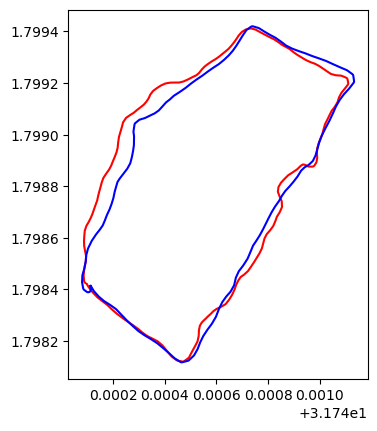

In [21]:
testPlot1 = shapely.wkt.loads(traceFarmDF.iloc[229][1])
testPlot2 = shapely.wkt.loads(traceFarmDF.iloc[229][2])
polys = [testPlot1, testPlot2]
colors = ['red','blue']
gpd.GeoSeries(polys).boundary.plot(color = colors)

<AxesSubplot:>

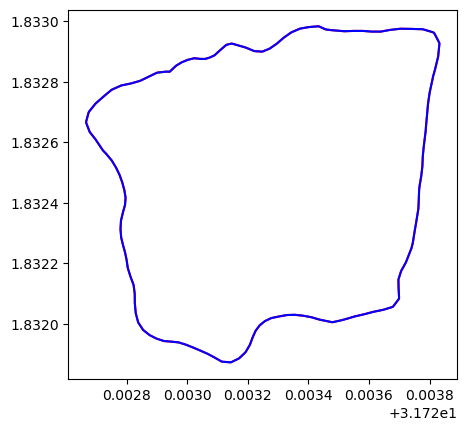

In [22]:
testPlot1 = shapely.wkt.loads(traceFarmDF.iloc[12][1])
testPlot2 = shapely.wkt.loads(traceFarmDF.iloc[12][2])
polys = [testPlot1, testPlot2]
colors = ['red','blue']
gpd.GeoSeries(polys).boundary.plot(color = colors)

In [23]:
percentOverlapSortedDF.loc[(percentOverlapSortedDF["Index"] == 12)]

,Index,percentOverlap
318,12,1.0


In [24]:
traceFarmDF.loc[(traceFarmDF["id"] == 12)]

,id,Pair_a,Pair_b
12,12,"POLYGON ((31.7234581283977 1.83297173912079, 3...","POLYGON ((31.7234581283977 1.83297173912079, 3..."


### streamlit data files

In [75]:
percentOverlapSortedDF.to_csv('percentOverlapSortedDF.csv',index=False)
indexStoreDF.to_csv('indexStoreDF.csv',index=False)

In [80]:
testDF

,Index,Duplicate index A,Duplicate index B
0,0,[0],[0]
1,1,[1],[1]
2,2,[2],[2]
3,3,[3],[3]
4,4,[4],[4]
...,...,...,...
508,508,"[507, 508, 509, 510, 511]","[508, 509, 510, 511, 512]"
509,509,"[507, 508, 509, 510, 511]","[508, 509, 510, 511, 512]"
510,510,"[507, 508, 509, 510, 511]","[508, 509, 510, 511, 512]"
511,511,"[507, 508, 509, 510, 511]","[508, 509, 510, 511, 512]"


In [137]:
# read the csv
pairID = 0
testDF = pd.read_csv('indexStoreDF.csv')
dupes = testDF.loc[(testDF["Index"] == pairID)].iloc[0][1]
dupes.replace(str(pairID),"")

'[]'

In [118]:
dupesA = indexStoreDF.loc[(indexStoreDF["Index"] == pairID)].iloc[0][1].replace(", " + str(pairID), "")
dupesB = indexStoreDF.loc[(indexStoreDF["Index"] == pairID)].iloc[0][2].replace(", " + str(pairID), "")

AttributeError: 'list' object has no attribute 'replace'